In [1]:
import mglearn
import numpy as np

w[0]: 0.393906  b: -0.031804


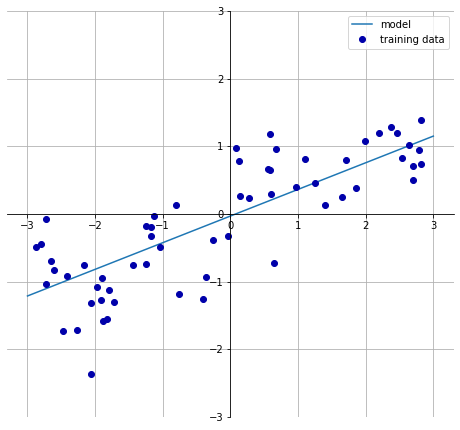

In [2]:
mglearn.plots.plot_linear_regression_wave()

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
x,y = mglearn.datasets.make_wave(n_samples=60)

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)

In [6]:
lr = LinearRegression().fit(x_train,y_train)

In [7]:
# 선형 회귀 모델이 학습한 가중치와 편향보기

print('lr의 가중치(weight) : {}'.format(lr.coef_))
print('lr의 편향(bias) : {}'.format(lr.intercept_))

lr의 가중치(weight) : [0.39390555]
lr의 편향(bias) : -0.03180434302675973


In [8]:
# 훈련 세트와 테스트 세트 점수 확인

print('훈련세트 점수 : {:.2f}'.format(lr.score(x_train,y_train)))
print('테스트세트 점수 : {:.2f}'.format(lr.score(x_test,y_test)))

훈련세트 점수 : 0.67
테스트세트 점수 : 0.66


In [9]:
x,y = mglearn.datasets.load_extended_boston()

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y)
lr = LinearRegression().fit(x_train,y_train)

In [11]:
print('훈련세트 점수 : {:.2f}'.format(lr.score(x_train,y_train)))
print('테스트세트 점수 : {:.2f}'.format(lr.score(x_test,y_test)))

훈련세트 점수 : 0.94
테스트세트 점수 : 0.84


In [12]:
x_train.shape

(379, 104)

# 가중치 패널티 ($\alpha$)

$\alpha$란 가중치를 억제하는 힘이라고 생각하면 편하다.

- Ridge 모델
    - $\alpha$가 커지면 가중치가 0에 가깝게 작아지지만, 실제 0이 되진않습니다.
- Lasso 모델
    - $\alpha$가 커지면 가중치가 0에 가까워 지고, 실제 0이 되어버린다.
    - 이러한 특징을 모델에 의한 특성 선택이라고 한다.
    
    

가중치와 w는 반비례

In [14]:
# 사용할 데이터셋 : 확장된 보스턴 주택가격 데이터셋 사용

# 릿지 확인하기
from sklearn.linear_model import Ridge

ridge = Ridge().fit(x_train,y_train)

In [15]:
print('훈련세트의 점수 : {:.2f}'.format(ridge.score(x_train,y_train)))
print('테스트세트의 점수 : {:.2f}'.format(ridge.score(x_test,y_test)))

훈련세트의 점수 : 0.87
테스트세트의 점수 : 0.80


In [22]:
# alpha 값에 따른 릿지 모델의 성능 확인
# alpha는 10 단위로 설정함

# alhap를 10으로 설정한 경우
ridge10 = Ridge( alpha= 10 ).fit(x_train,y_train)

In [23]:
print('훈련세트의 점수 : {:.2f}'.format(ridge10.score(x_train,y_train)))
print('테스트세트의 점수 : {:.2f}'.format(ridge10.score(x_test,y_test)))

훈련세트의 점수 : 0.77
테스트세트의 점수 : 0.73


In [24]:
# alpha를 0.1로 설정한 경우
ridge01 = Ridge( alpha= 0.1 ).fit(x_train,y_train)

print('훈련세트의 점수 : {:.2f}'.format(ridge01.score(x_train,y_train)))
print('테스트세트의 점수 : {:.2f}'.format(ridge01.score(x_test,y_test)))

훈련세트의 점수 : 0.91
테스트세트의 점수 : 0.85


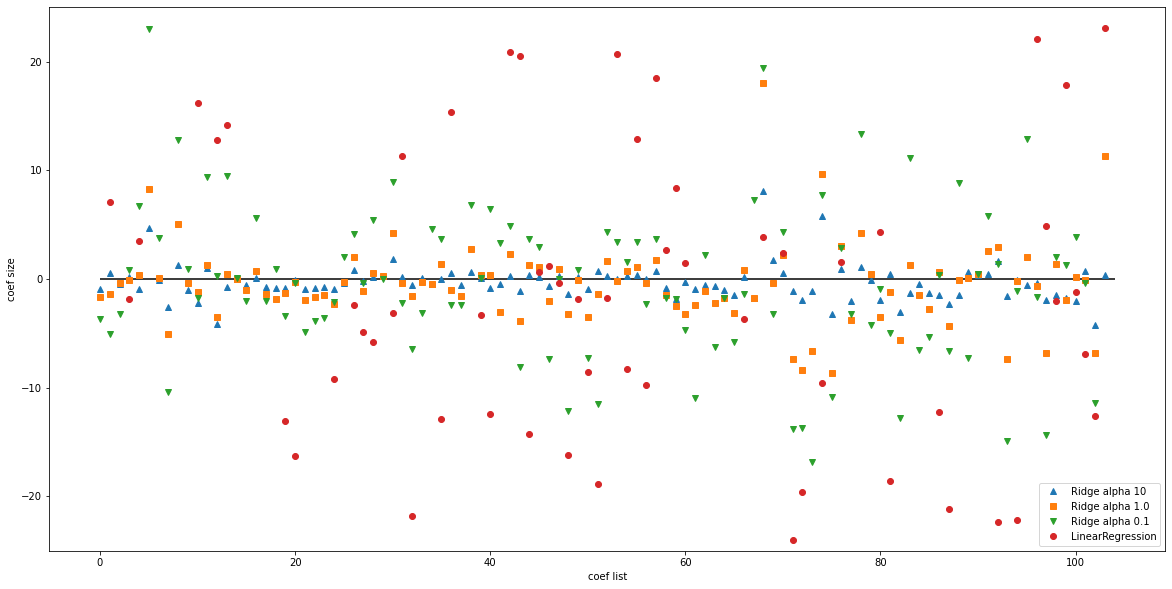

In [25]:
# alpha값에 따른 각각 특성에 대한 가중치의 분포도를 확인해 보자
# 선형 모델의 coef- 변수에 가중치 배열이 들어있다.

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(ridge10.coef_,'^',label='Ridge alpha 10')
plt.plot(ridge.coef_,'s',label='Ridge alpha 1.0')
plt.plot(ridge01.coef_,'v',label='Ridge alpha 0.1')
plt.plot(lr.coef_,'o',label='LinearRegression')

plt.xlabel('coef list')
plt.ylabel('coef size')
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()
plt.show()


In [31]:
# Lasso

from sklearn.linear_model import Lasso

lasso = Lasso().fit(x_train,y_train)

print('훈련세트의 점수 : {:.2f}'.format(lasso.score(x_train,y_train)))
print('테스트세트의 점수 : {:.2f}'.format(lasso.score(x_test,y_test)))

훈련세트의 점수 : 0.25
테스트세트의 점수 : 0.26


In [32]:
print('lasso에서 선택한 특성의 개수 :  {}'.format(np.sum(lasso.coef_ != 0)))

lasso에서 선택한 특성의 개수 :  3


In [33]:
lasso001 = Lasso(alpha=0.01).fit(x_train,y_train)

print('훈련세트의 점수 : {:.2f}'.format(lasso001.score(x_train,y_train)))
print('테스트세트의 점수 : {:.2f}'.format(lasso001.score(x_test,y_test)))
print('lasso001에서 선택한 특성의 개수 :  {}'.format(np.sum(lasso001.coef_ != 0)))

훈련세트의 점수 : 0.88
테스트세트의 점수 : 0.80
lasso001에서 선택한 특성의 개수 :  29


In [34]:
lasso0001 = Lasso(alpha=0.001).fit(x_train,y_train)

print('훈련세트의 점수 : {:.2f}'.format(lasso0001.score(x_train,y_train)))
print('테스트세트의 점수 : {:.2f}'.format(lasso0001.score(x_test,y_test)))
print('lasso001에서 선택한 특성의 개수 :  {}'.format(np.sum(lasso0001.coef_ != 0)))

훈련세트의 점수 : 0.92
테스트세트의 점수 : 0.86
lasso001에서 선택한 특성의 개수 :  74


C:\Users\DIAMOND\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1048.0744350875511, tolerance: 3.313976021108181
  model = cd_fast.enet_coordinate_descent(


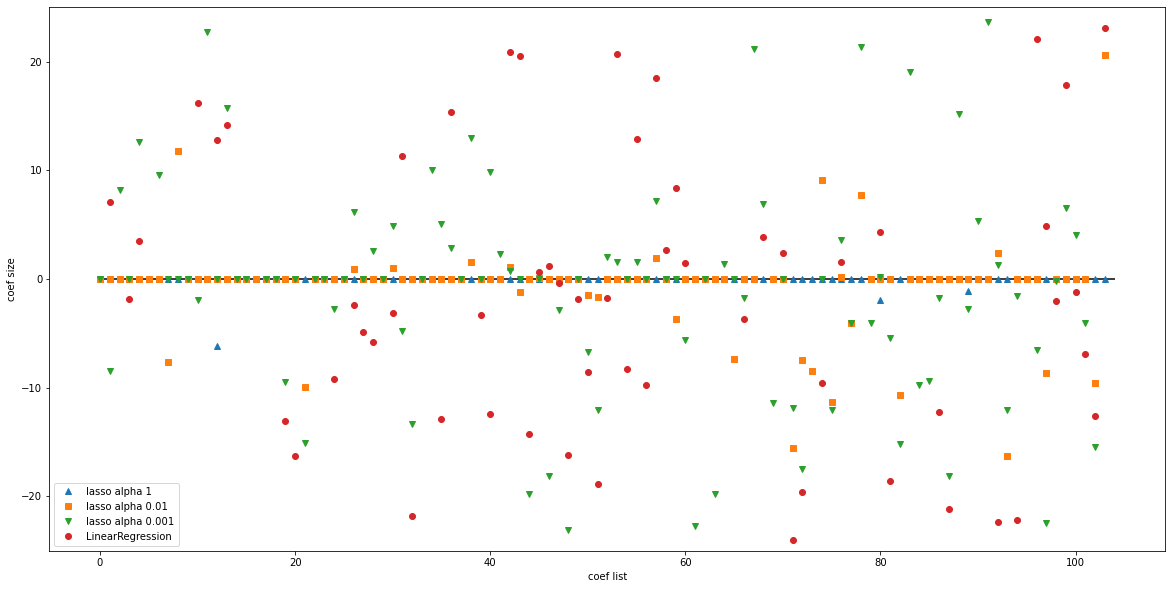

In [36]:
plt.figure(figsize=(20,10))

plt.plot(lasso.coef_,'^',label='lasso alpha 1')
plt.plot(lasso001.coef_,'s',label='lasso alpha 0.01')
plt.plot(lasso0001.coef_,'v',label='lasso alpha 0.001')
plt.plot(lr.coef_,'o',label='LinearRegression')

plt.xlabel('coef list')
plt.ylabel('coef size')
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()
plt.show()


# Linear Model Binary Classification
- 이진 선형 분류기는 직선, 평면, 초평면을 활용해 클래스를 구분 지어주는 분류기이다.
- 적절한 w 와 b를 찾아서 그어주는 방법이 있고, (딥러닝에서 사용하는 방식, 손실함수 사용)
- 가중치 w와 b를 조절해 가며 규제를 사용하는 방법이 있다. - SVM

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

C:\Users\DIAMOND\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


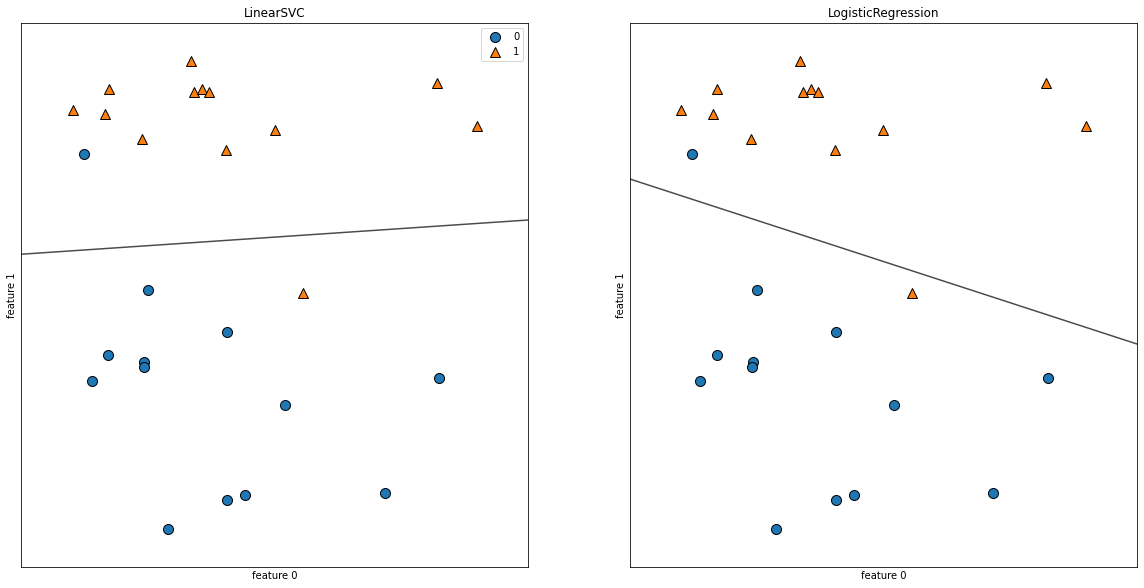

In [41]:
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
  clf = model.fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title("{}".format(clf.__class__.__name__))
  ax.set_xlabel("feature 0")
  ax.set_ylabel("feature 1")
axes[0].legend()
plt.show()

LinearSCV -> C라는 규제매개변수를 이용한다 ($\alpha$와 비슷하게 가중치를 조절할수 있는 매개변수)

logisticRegression : sigmoid함수를 활용해서 loss 가 최소화 되는 방향으로 가중치와 편향을 조절하는 방식

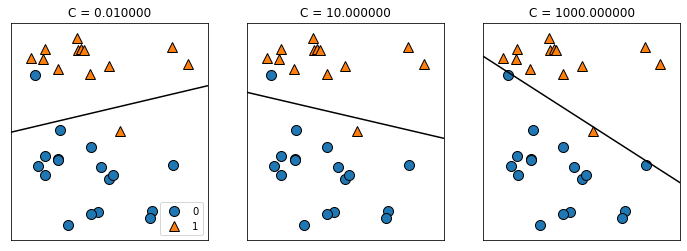

In [43]:
#svc 분류 그래프 확인하기
# 규제 매개변수 c를 활용한다 -> alpha의 반대개념
# c가 증가하면 규제가 감소하면서 가중치가 증가한다.
# c가 감소하면 규제가 증가하면서 가중치가 감소

mglearn.plots.plot_linear_svc_regularization()

c가 낮아지면 가중치가 감소 -> 가중치가 감소하면 모델이 단순해진다.(복잡도가 내려간다) -> 데이터의 패턴만을 분석하기 시작

c가 높아지면 가중치가 증가 -> 가중치가 증가하면 모델이 복잡해진다 (복잡도가 올라간다) -> 데이터 포인트 각각을 신경쓰기 시작한다.

In [51]:
def print_score(model,x,y):
    x_train,x_test=x
    y_train,y_test=y
    print('훈련세트의 점수 : {:.3f}'.format(model.score(x_train,y_train)))
    print('테스트세트의 점수 : {:.3f}'.format(model.score(x_test,y_test)))

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

x_train,x_test,y_train,y_test = train_test_split(cancer.data,
                                                cancer.target,
                                                stratify=cancer.target,
                                                random_state = 42)
logreg=LogisticRegression().fit(x_train,y_train)

C:\Users\DIAMOND\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
print_score(logreg,x=(x_train,x_test),y=(y_train,y_test))

훈련세트의 점수 : 0.955
테스트세트의 점수 : 0.958


In [54]:
#logreg는 과소적합 일 수도 있을 것 같다.
# 복잡도를 증가시켜보자
# c 값을 증가

logreg100 = LogisticRegression(C=100).fit(x_train,y_train)
print_score(logreg100,x=(x_train,x_test),y=(y_train,y_test))

훈련세트의 점수 : 0.946
테스트세트의 점수 : 0.958


C:\Users\DIAMOND\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
logreg001 = LogisticRegression(C=0.01).fit(x_train,y_train)
print_score(logreg001,x=(x_train,x_test),y=(y_train,y_test))

훈련세트의 점수 : 0.934
테스트세트의 점수 : 0.930


C:\Users\DIAMOND\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## linear model Multiple Classification
- 이진분류 : 0 아니면 1
- 다중분류 : 0,1,2 ......

기본적인 머신러닝 모델들은 이진분류만 지원하고, 다중분류는 지원하지 않는다.

0,1,2 세종류의 클래스가 있다고 가정하면 ,0과 1비교하고, 1과 2를 비고하고, 2와 0을 비교해서 확률이 가장큰 클래스를 최종 결과물로 삼는다.

이 때 사용되어지는 수식이 softmax 함수이다.
다중 분류함수도 이진분류 함수와 같다

다중 분류가 되었을 때 각클래스로 분류될 확률은 소프트맥스 함수에 의해 결정된다.

In [ ]:
from sklearn.datasets import make_blobs

x,y = make_blobs(random_state=42)

mglearn.discrete_scatter(x[:0],)

In [ ]:
linear_svm = LinearSVC().fit(x,y)

mglearn.discrete_scatter(X[:,0],x[:,1],y)
line = np.linspace(-15,15)

for coef,intercept,color in zip(linear_svm.coef_,linear_svm.intercept_,mglearn.cm3.colors)